# Differential Diet Affects HDL Subspecies 

IPYNB Set Up:

1.) Dependancies

2.) Read and arrange Data

3.) Basic Look at Data

4.) Comparison of Z-Score Averages for Each Protein in Each Diet

5.) Principle Component Analysis (PCA) use and link to doccumentation

6.) Support Vector Machine (SVM)

7.) PLS-Discriminatory analysis (PLS-DA) use and link to doccumentation

# Dependancies (Libraries Used)

In [348]:
import sklearn # Does most of the complex stats and is well doccumented
import seaborn as sns #this is a great library for visualization of ML
import scipy #statistical work including corrilation matrix
import pandas as pd # manipulates/reshapes the Data and does some of the graphing
import matplotlib.pyplot as plt # more sophisticated graphing techniques
import numpy as np # A commonly used library for math and array manipulation (required for sklearn)
import os #allows us to set and read directories and folder contents

# Read Data

Data has been sorted by diet and un-necessary data eliminated in excel

In [388]:
os.chdir('C:/Users/barry/Dropbox/Bo') #go to directory
data = pd.read_csv('bodata.csv') #read file into pandas dataframe

# Basic Look at Data
diet_1 = High Carb

diet_2 = High Protein

diet_3 = High Fat

In [389]:
#Target value (For Later)
lab = data.iloc[:,1]
#normalize by z score
data2 = scipy.stats.zscore(data.iloc[:,3:])
data2 = pd.DataFrame(data2)
data2.columns = list(data.iloc[:,3:])
#get each row of data wanted and seperate by diet
a_third = int((len(data2)/3))
diet_1 = data2.iloc[0:a_third,:28]
diet_2 = data2.iloc[a_third:a_third*2,:28]
diet_3 = data2.iloc[a_third*2:a_third*3,:28]

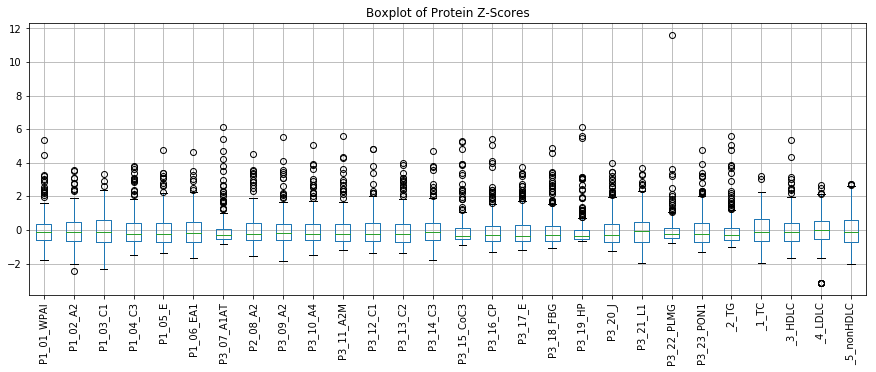

In [390]:
data2.iloc[:,:28].plot.box(figsize = (15, 5), rot = 90, title = "Boxplot of Protein Z-Scores", grid = True)

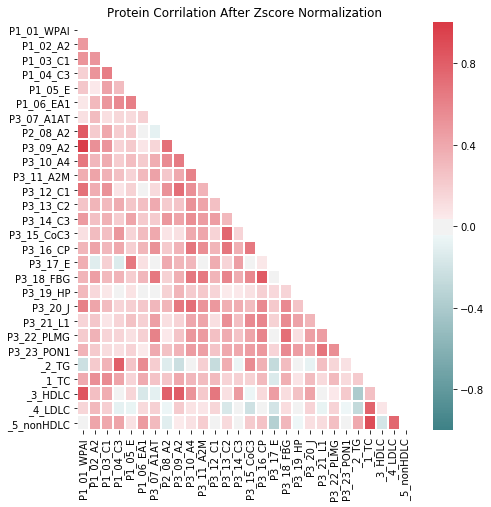

In [424]:
#corrilation matrix
fig, ax = plt.subplots(figsize = (7.5,7.5))
protdf = pd.DataFrame(data2.iloc[:,:28])
corr = protdf.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap = cmap, linewidth = 1, xticklabels = list(data2.iloc[:,:28]), yticklabels = list(data2.iloc[:,:28]), vmin = -1, vmax = 1)
plt.title('Protein Corrilation After Zscore Normalization')
plt.show()

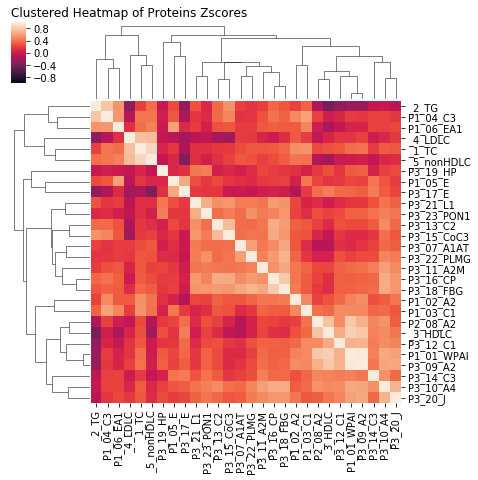

In [419]:
sns.clustermap(corr,xticklabels = list(data2.iloc[:,:28]), yticklabels = list(data2.iloc[:,:28]), vmin = -1, vmax = 1, figsize = (7,7))
plt.title('Clustered Heatmap of Proteins Zscores', loc = 'left')
plt.show()

In [393]:
#Simple Comparison of Averages for each diet
mysub = np.subtract(diet_1,diet_2)
d1_d2 = pd.DataFrame(mysub)
mysub = np.subtract(diet_3,diet_2)
d3_d2 = pd.DataFrame(mysub)
mysub = np.subtract(diet_3,diet_1)
d3_d1 = pd.DataFrame(mysub)
#means of subtractions
means = pd.DataFrame({'d1_d2':d1_d2.mean(),'d3_d2':d3_d2.mean(), 'd3_d1':d3_d1.mean()})

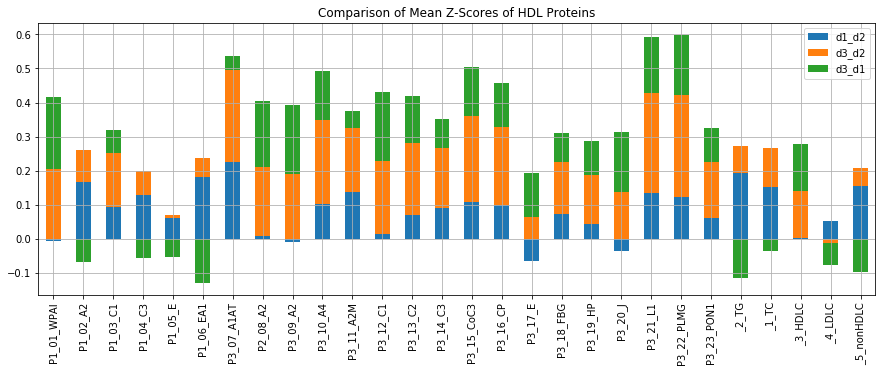

In [394]:
means.plot.bar(figsize=(15, 5), grid = True, stacked = True, title = "Comparison of Mean Z-Scores of HDL Proteins")

# PCA

In [395]:
x = data.iloc[:,3:] # values to use
y = lab # target aka. labels

In [396]:
from sklearn.preprocessing import StandardScaler #imported to normalize
x = StandardScaler().fit_transform(x) # in this step standardscaler() converts to np array so...
x = pd.DataFrame(x) # convert back to pandas dataframe

c:\users\barry\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\barry\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [397]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1) # concatinate to make graphing easy

# Graph PCA

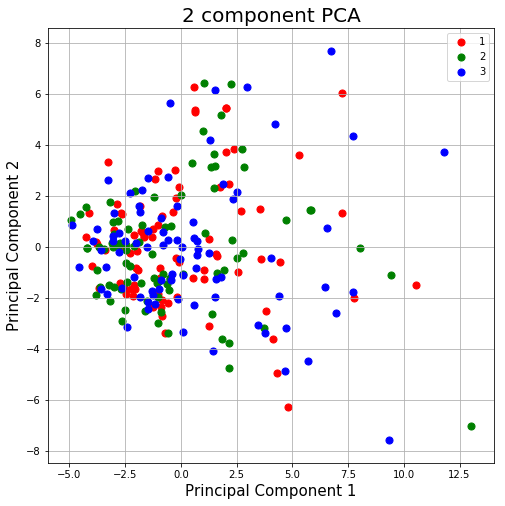

In [398]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2,3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diet'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

PCA does not demonstrate the strongest differences between diets. By graphing a line *not shown* through the points we do find a slight trend of increase of component 2 in high fat and high protein and a decrease in high carb.

# Support Vector Machine (SVM)

In [420]:
#SVM
X = data2
y = lab
clf = sklearn.svm.SVC(gamma = 'scale')
clf.fit(X,y)
svm_pred = clf.predict(X)
#get accuracy
acc = 0
y = lab.as_matrix()
for x in range(0, len(svm_pred)):
    if svm_pred[x] == y[x]:
        acc += 1
print ("Accuracy = " + str(acc/len(svm_pred)*100) + "%")

Accuracy = 53.81526104417671%


c:\users\barry\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [422]:
#Compare Accuracy of 53.8% to random array of 1 through 3 evenly distributed
z = np.random.randint(1,4,size = (249))
#using same svm as before accuracy for 20 trials
a = []
for i in range(0, 20):
    acc = 0
    for x in range(0, len(svm_pred)):
        if y[x] == z[x]:
            acc += 1
    a.append(acc/len(svm_pred)*100)
avg = np.mean(a)
print("The Average Accuracy of 20 Random is: " + str(avg) + '%')

The Average Accuracy of 20 Random is: 36.54618473895583%


53.8% is not great prediction accuracy, however compared to random chance (exp. 33.3%) this is quite the improvment. I will try and optimize this SVM and understand the weight that each protein has on the machine.  